# Introduction to `linopy`

:::{note}
This material is mostly adapted from the following resources:
- [Linopy Getting Started](https://linopy.readthedocs.io/en/latest/index.html)
:::

<img src="https://github.com/PyPSA/linopy/blob/master/doc/logo.png?raw=true" width="300px" />

[Linopy](https://linopy.readthedocs.io/en/latest/index.html)  is an open-source framework for formulating, solving, and analyzing optimization problems with Python.

With Linopy, you can create optimization models within Python that consist of decision variables, constraints, and optimization objectives. You can then solve these instances using a variety of commercial and open-source solvers (specialised software).

[Linopy](https://linopy.readthedocs.io/en/latest/index.html) supports a wide range of problem types, including:

- Linear programming
- Integer programming
- Mixed-integer programming
- Quadratic programming


:::{note}
Documentation for this package is available at https://linopy.readthedocs.io.
:::

:::{note}
If you have not yet set up Python on your computer, you can execute this tutorial in your browser via [Google Colab](https://colab.research.google.com/). Click on the rocket in the top right corner and launch "Colab". If that doesn't work download the `.ipynb` file and import it in [Google Colab](https://colab.research.google.com/).

Then install the following packages by executing the following command in a Jupyter cell at the top of the notebook.

```sh
!pip install pandas linopy
```
:::

## Solve a Basic Model

In this example, we explain the basic functions of the linopy `Model` class. First, we are setting up a very simple linear optimization model, given by

\begin{alignat*}{3}
\min_{x,y} \quad & x + 2y & \\
\text{s.t.} \quad x \geq 0 \\
\quad y \geq 0 \\
\quad 3x+7y \geq & 10, \\
\quad 5x +2y \geq & 3
\end{alignat*}


### Initializing a `Model`

The Model class in Linopy is a fundamental part of the library. It serves as a container for all the relevant data associated with a linear optimization problem. This includes variables, constraints, and the objective function.

In [1]:
import linopy

m = linopy.Model()

This creates a new Model object, which you can then use to define your optimization problem.

:::{note}
It is good practice to choose a short variable name (like `m`) to reduce the verbosity of your code.
:::

### Adding decision variables

**Variables** are the unknowns of an optimisation problems and are intended to be given values by solving an optimisation problem. A variable can always be assigned with a lower and an upper bound. In our case, both `x` and `y` have a lower bound of zero (default is unbouded). In linopy, you can add variables to a `Model` using the `add_variables()` method:

In [2]:
x = m.add_variables(lower=0, name="x")
y = m.add_variables(lower=0, name="y");

`x` and `y` are linopy variables of the class `linopy.Variable`. Each of them contain all relevant information that define it. The `name` parameter is optional but can be useful for referencing the variables later.

In [3]:
x

Variable
--------
x ∈ [0, inf]

In [4]:
m.variables

linopy.model.Variables
----------------------
 * x
 * y

In [5]:
m.variables["x"]

Variable
--------
x ∈ [0, inf]

### Adding Constraints

**Constraints** are equality or inequality expressions that define the *feasible* space of the decision variables. They consist of the left hand side (LHS) and the right hand side (RHS). The first constraint that we want to write down is $3x + 7y = 10$ which we write out exactly in the mathematical way:

In [6]:
3 * x + 7 * y >= 10

Constraint (unassigned)
-----------------------
+3 x + 7 y ≥ 10.0

Note, we can also mix the constant and the variable expression, like this

In [7]:
3 * x + 7 * y - 10 >= 0

Constraint (unassigned)
-----------------------
+3 x + 7 y ≥ 10.0

… and linopy will automatically take over the separation of variables expression on the LHS, and constant values on the RHS.

The constraint is currently not assigned to the model. We assign it by calling the `add_constraints()` function:

In [8]:
m.add_constraints(3 * x + 7 * y >= 10)
m.add_constraints(5 * x + 2 * y >= 3);

In [9]:
m.constraints

linopy.model.Constraints
------------------------
 * con0
 * con1

In [10]:
m.constraints["con0"]

Constraint `con0`
-----------------
+3 x + 7 y ≥ 10.0

### Adding the Objective 

The objective function defines what you want to optimize. It is a function of variables that a solver attempts to maximize or minimize. You can set the objective function of a `linopy.Model` using the `add_objective()` method. For our example that would be

In [11]:
m.add_objective(x + 2 * y, sense="min")

In [12]:
m.objective

Objective:
----------
LinearExpression: +1 x + 2 y
Sense: min
Value: None

Note, we can either minimize or maximize in linopy. Per default, linopy applies `sense='min'` making it not necessary to explicitly define the optimization sense. In summary:

In [13]:
m

Linopy LP model

Variables:
----------
 * x
 * y

Constraints:
------------
 * con0
 * con1

Status:
-------
initialized

### Solving the Model

Once you've defined your `linopy.Model`  with variables, constraints, and an objective function, you can solve it using the `solve` method:

In [14]:
m.solve(solver_name='gurobi')

Set parameter Username
Set parameter LicenseID to value 2604332
Academic license - for non-commercial use only - expires 2025-12-30
Read LP format model from file C:\Users\34620\AppData\Local\Temp\linopy-problem-hi99hoz8.lp
Reading time = 0.02 seconds
obj: 2 rows, 2 columns, 4 nonzeros
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x4c5ee539
Coefficient statistics:
  Matrix range     [2e+00, 7e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 1e+01]
Presolve time: 0.06s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.625000e+00   0.000000e+00      0s
       2    2.8620690e+00   0.00

('ok', 'optimal')

Solvers are needed to compute solutions to the optimization models. There exists a large variety of solvers. In many cases, they specialise in certain problem types or solving algorithms, e.g. linear or nonlinear problems.

- **open-source examples**: [CBC](https://www.coin-or.org/Cbc/), [GLPK](https://www.gnu.org/software/glpk/), [Ipopt](https://coin-or.github.io/Ipopt/), [HiGHS](https://highs.dev)
- **commercial examples**: [Gurobi](https://www.gurobi.com/), [CPLEX](https://www.ibm.com/de-de/analytics/cplex-optimizer), [FICO Xpress](https://www.fico.com/en/products/fico-xpress-optimization)

The open-source solvers are sufficient to handle meaningful linopy models with hundreds to several thousand variables and constraints. However, as applications get larger or more complex, there may be a need to turn to commercial solvers (which often provide free academic licenses).

For this course, we will use Gurobi (if you haven't done so, [install it in your environment](https://martavp.github.io/integrated-energy-grids/intro-gurobi.html) ) an alternative is to use [HiGHS](https://highs.dev).

### Retrieving optimisation results

The solution of the linear problem is assigned to the variables under `solution` in form of a `xarray.Dataset`.

In [15]:
x.solution

<xarray.DataArray 'solution' ()> Size: 8B
array(0.03448276)

In [16]:
y.solution

<xarray.DataArray 'solution' ()> Size: 8B
array(1.4137931)

We can also read out the objective value:

In [17]:
m.objective.value

2.862068965517241

And the dual values (or shadow prices) of the model's constraints: 

In [18]:
m.dual["con0"]

<xarray.DataArray 'con0' ()> Size: 8B
array(0.27586207)

In [19]:
m.dual["con1"]

<xarray.DataArray 'con1' ()> Size: 8B
array(0.03448276)

:::{note}
The remaining of this introduction is NOT necessary to solve problems in Lecture 2. We have included it here for completeness and becuase it might be useful to solver optimization problems involving multiple time steps in future lectures. 
:::


## Use Coordinates
Now, the real power of the package comes into play! 

Linopy is structured around the concept that variables, and therefore expressions and constraints, have coordinates. That is, a `Variable` object actually contains multiple variables across dimensions, just as we know it from a `numpy` array or a `pandas.DataFrame`.

Suppose the two variables `x` and `y` are now functions of time `t` and we would modify the problem according to: 

Minimize:
$$\sum_t x_t + 2 y_t$$

subject to:

$$x_t \ge 0 \qquad \forall t $$
$$y_t \ge 0 \qquad \forall t $$
$$3x_t + 7y_t \ge 10 t \qquad \forall t$$
$$5x_t + 2y_t \ge 3 t \qquad \forall t$$

whereas `t` spans all the range from 0 to 10.

In order to formulate the new problem with linopy, we start again by initializing a model.

In [20]:
m = linopy.Model()

Again, we define `x` and `y` using the `add_variables()` function, but now we are adding a `coords` argument. This automatically creates optimization variables for all coordinates, in this case time-steps `t`.

In [21]:
import pandas as pd

time = pd.Index(range(10), name="time")

x = m.add_variables(
    lower=0,
    coords=[time],
    name="x",
)
y = m.add_variables(lower=0, coords=[time], name="y")

In [22]:
x

Variable (time: 10)
-------------------
[0]: x[0] ∈ [0, inf]
[1]: x[1] ∈ [0, inf]
[2]: x[2] ∈ [0, inf]
[3]: x[3] ∈ [0, inf]
[4]: x[4] ∈ [0, inf]
[5]: x[5] ∈ [0, inf]
[6]: x[6] ∈ [0, inf]
[7]: x[7] ∈ [0, inf]
[8]: x[8] ∈ [0, inf]
[9]: x[9] ∈ [0, inf]

Following the previous example, we write the constraints out using the syntax from above, while multiplying the RHS with `t`. Note that the coordinates from the LHS and the RSH have to match. 

:::{note}
In the beginning, it is recommended to use explicit dimension names. In this way, things remain clear and no unexpected broadcasting (which we show later) will happen.
:::

In [23]:
factor = pd.Series(time, index=time)

3 * x + 7 * y >= 10 * factor

Constraint (unassigned) [time: 10]:
-----------------------------------
[0]: +3 x[0] + 7 y[0] ≥ -0.0
[1]: +3 x[1] + 7 y[1] ≥ 10.0
[2]: +3 x[2] + 7 y[2] ≥ 20.0
[3]: +3 x[3] + 7 y[3] ≥ 30.0
[4]: +3 x[4] + 7 y[4] ≥ 40.0
[5]: +3 x[5] + 7 y[5] ≥ 50.0
[6]: +3 x[6] + 7 y[6] ≥ 60.0
[7]: +3 x[7] + 7 y[7] ≥ 70.0
[8]: +3 x[8] + 7 y[8] ≥ 80.0
[9]: +3 x[9] + 7 y[9] ≥ 90.0

It always helps to write out the constraints before adding them to the model. Since they look good, let's assign them.

In [24]:
con1 = m.add_constraints(3 * x + 7 * y >= 10 * factor, name="con1")
con2 = m.add_constraints(5 * x + 2 * y >= 3 * factor, name="con2")
m

Linopy LP model

Variables:
----------
 * x (time)
 * y (time)

Constraints:
------------
 * con1 (time)
 * con2 (time)

Status:
-------
initialized

Now, when it comes to the objective, we use the `sum` function of `linopy.LinearExpression`. This stacks all terms all terms of the `time` dimension and writes them into one big expression. 

In [25]:
obj = (x + 2 * y).sum()

In [26]:
obj

LinearExpression
----------------
+1 x[0] + 2 y[0] + 1 x[1] ... +2 y[8] + 1 x[9] + 2 y[9]

In [27]:
m.add_objective(obj, overwrite=True)

Then, we can solve:

In [28]:
m.solve()

Set parameter Username
Set parameter LicenseID to value 2604332
Academic license - for non-commercial use only - expires 2025-12-30
Read LP format model from file C:\Users\34620\AppData\Local\Temp\linopy-problem-989qt21e.lp
Reading time = 0.01 seconds
obj: 20 rows, 20 columns, 40 nonzeros
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 20 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x3434cd3b
Coefficient statistics:
  Matrix range     [2e+00, 7e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 9e+01]
Presolve removed 2 rows and 2 columns
Presolve time: 0.03s
Presolved: 18 rows, 18 columns, 36 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   7.312500e+01   0.0000

('ok', 'optimal')

In order to inspect the solution. You can go via the variables, i.e. `y.solution` or via the `solution` aggregator of the model, which combines the solution of all variables.

In [29]:
m.solution.to_dataframe()

,x,y
time,,
0,0.000000,0.000000
1,0.034483,1.413793
2,0.068966,2.827586
3,0.103448,4.241379
4,0.137931,5.655172
5,0.172414,7.068966
6,0.206897,8.482759
7,0.241379,9.896552
8,0.275862,11.310345


Sometimes it can be helpful to plot the solution:

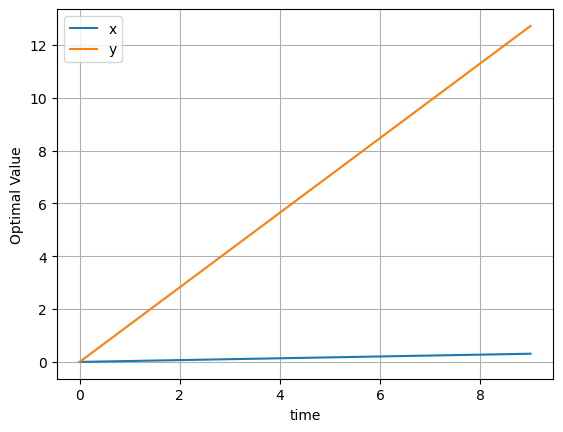

In [30]:
m.solution.to_dataframe().plot(grid=True, ylabel="Optimal Value");

Alright! Now you learned how to set up linopy variables and expressions with coordinates. For more advanced `linopy` operations you can check out the [User Guide](https://linopy.readthedocs.io/en/latest/user-guide.html).